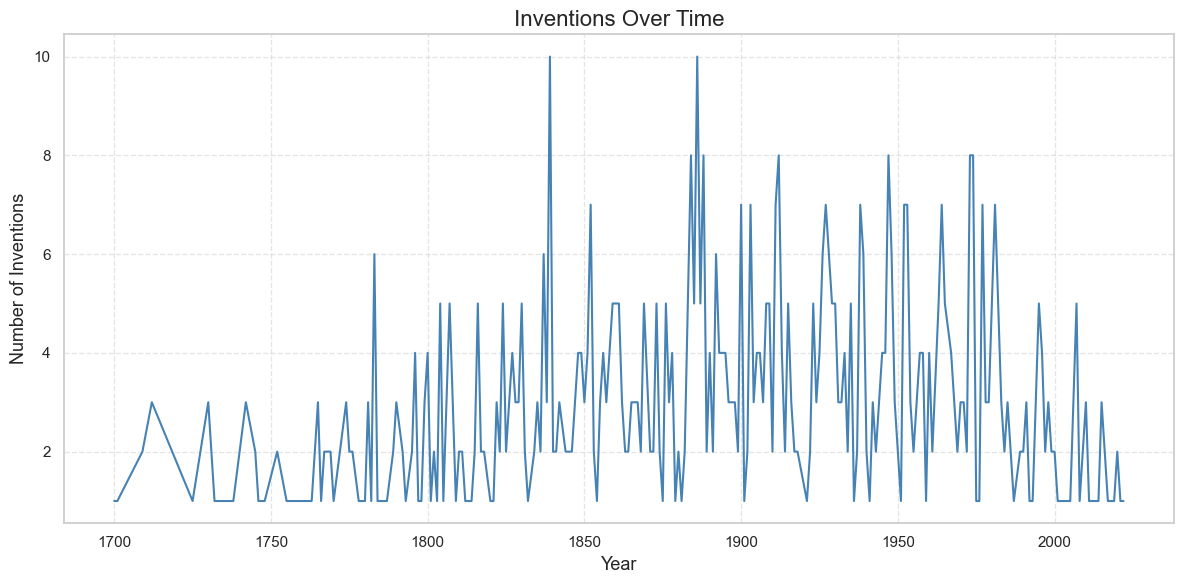

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["legend.fontsize"] = 11

df = pd.read_csv("../../raw_data/clean_data/clean_data_dd.csv")

df.columns = ["Year", "Country", "Invention", "Inventor", "Category", "General_Category"]

df = df[pd.to_numeric(df["Year"], errors="coerce").notna()]
df["Year"] = df["Year"].astype(int)

df["Decade"] = (df["Year"] // 10) * 10

plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby("Year").size(), color="steelblue")
plt.title("Inventions Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Inventions")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



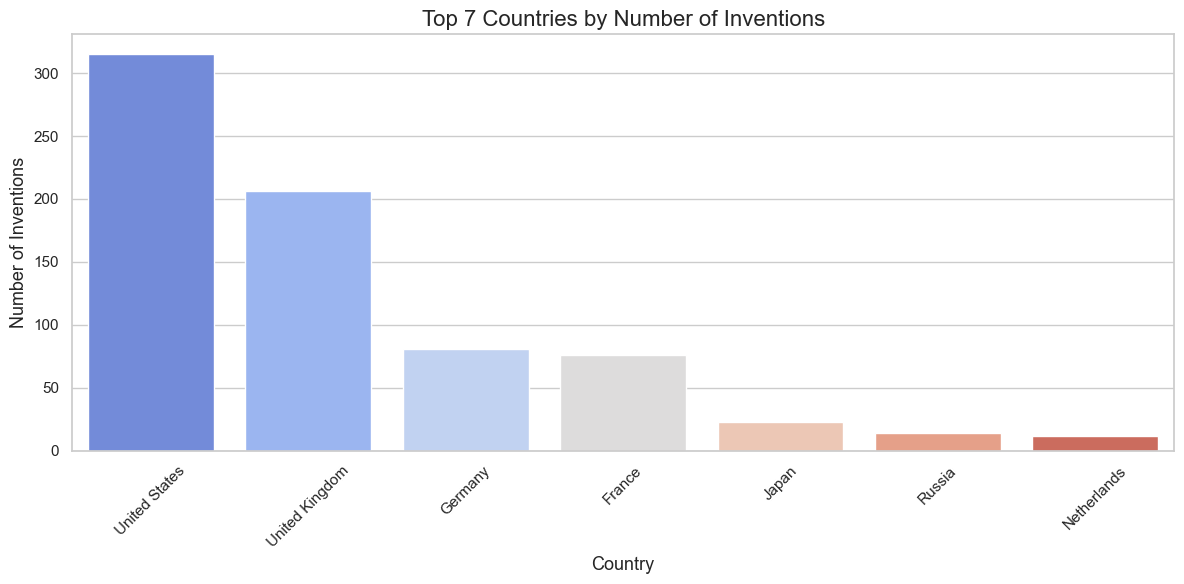

In [ ]:
df["Country"] = df["Country"].astype(str).str.split(";")
df = df.explode("Country")
df["Country"] = df["Country"].str.strip()
country_counts = df["Country"].value_counts().head(7)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=country_counts.index,
    y=country_counts.values,
    hue=country_counts.index,  
    palette="coolwarm",
    legend=False            
)
plt.title("Top 7 Countries by Number of Inventions")
plt.xlabel("Country")
plt.ylabel("Number of Inventions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



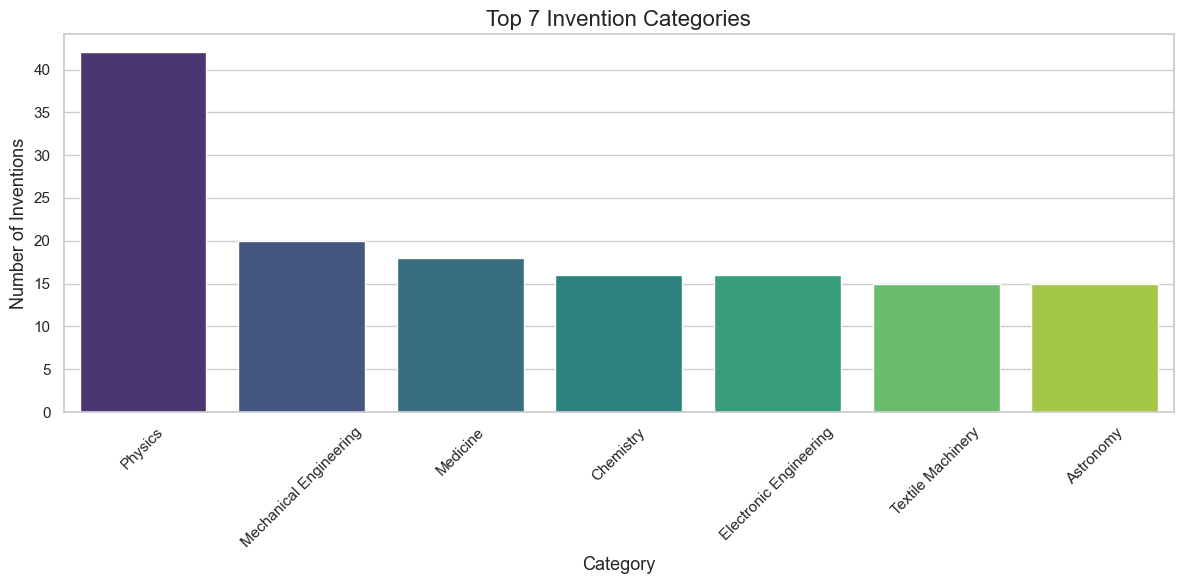

In [28]:
category_counts = df["Category"].value_counts().head(7)

top_categories = category_counts.reset_index()
top_categories.columns = ["Category", "Inventions"]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_categories,
    x="Category",
    y="Inventions",
    hue="Category",          
    palette="viridis",
    legend=False              
)
plt.title("Top 7 Invention Categories")
plt.xlabel("Category")
plt.ylabel("Number of Inventions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

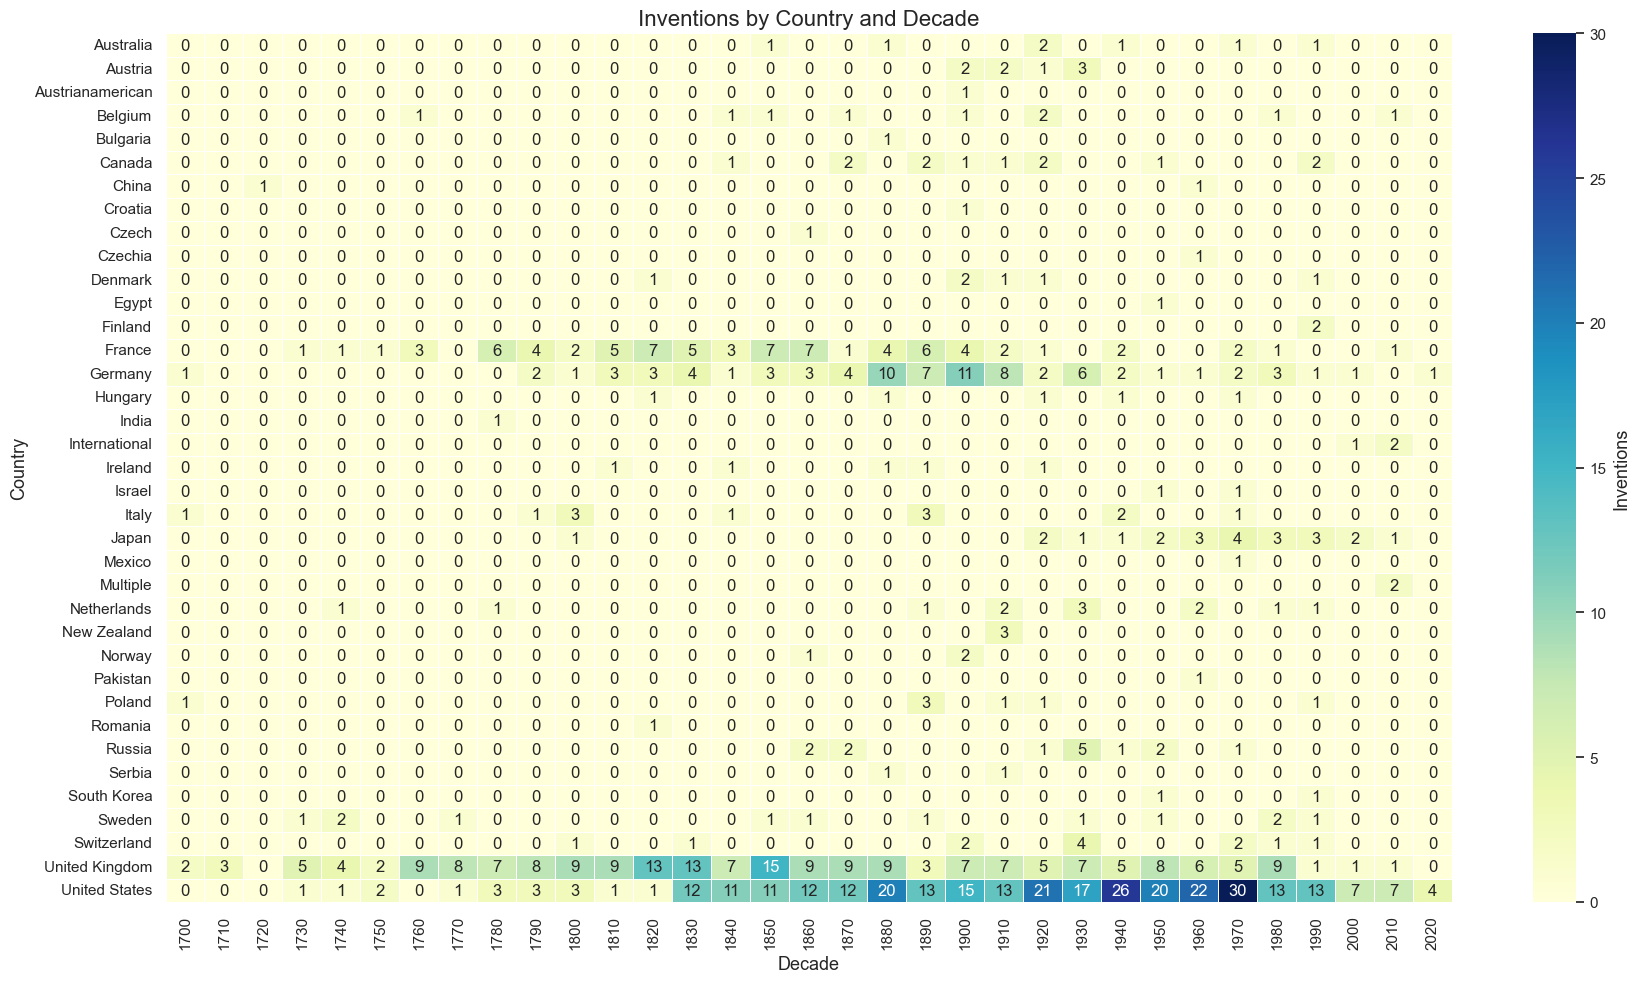

In [29]:
df = df[pd.to_numeric(df["Year"], errors="coerce").notna()]
df["Year"] = df["Year"].astype(int)

df["Country"] = df["Country"].astype(str).str.split(";")
df = df.explode("Country")
df["Country"] = df["Country"].str.strip()

df["Decade"] = (df["Year"] // 10) * 10

heat_data = df.groupby(["Country", "Decade"]).size().unstack(fill_value=0)

heat_data = heat_data.reindex(sorted(heat_data.columns), axis=1)

plt.figure(figsize=(18, 10))
sns.heatmap(
    heat_data,
    cmap="YlGnBu",
    annot=True,
    fmt="d",
    linewidths=0.5,
    cbar_kws={'label': 'Inventions'}
)
plt.title("Inventions by Country and Decade")
plt.xlabel("Decade")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

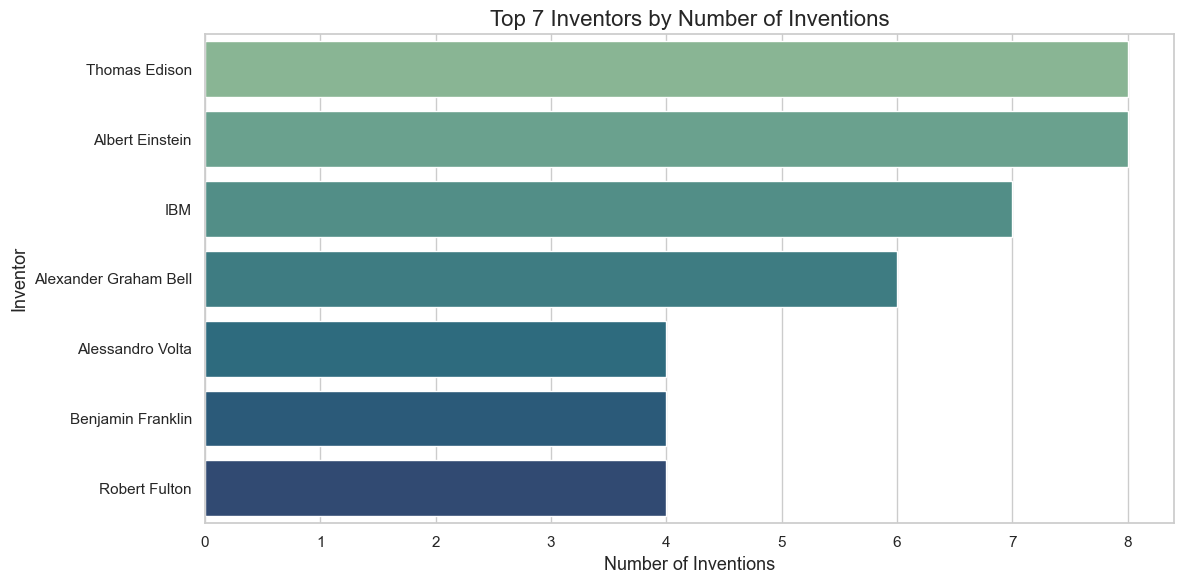

In [30]:
df["Inventor"] = df["Inventor"].astype(str).str.split(";")
df = df.explode("Inventor")
df["Inventor"] = df["Inventor"].str.strip()

inventor_counts = df["Inventor"].value_counts().head(7)
top_inventors = inventor_counts.reset_index()
top_inventors.columns = ["Inventor", "Inventions"]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_inventors,
    x="Inventions",
    y="Inventor",
    hue="Inventor",         
    palette="crest",
    legend=False
)
plt.title("Top 7 Inventors by Number of Inventions")
plt.xlabel("Number of Inventions")
plt.ylabel("Inventor")
plt.tight_layout()
plt.show()

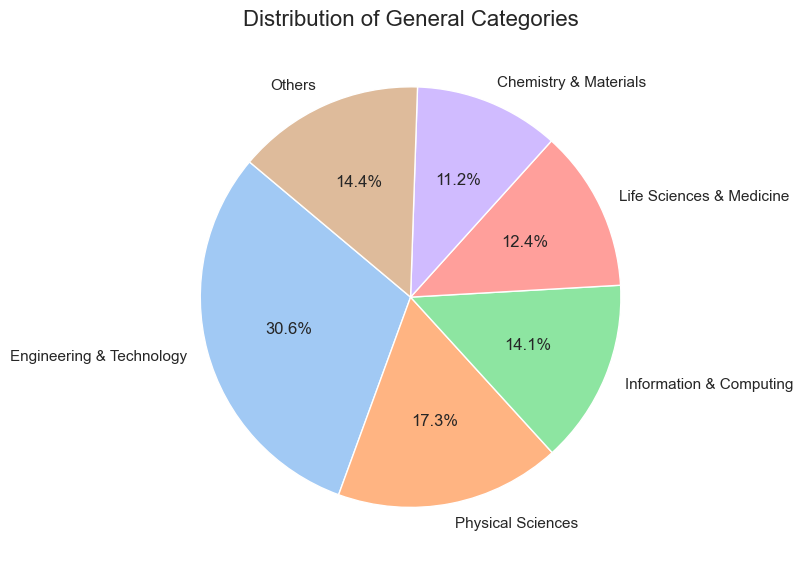

In [31]:
category_counts = df["General_Category"].value_counts()
total = category_counts.sum()

category_major = category_counts[category_counts / total >= 0.10]
category_minor = category_counts[category_counts / total < 0.10]

category_combined = category_major.copy()
category_combined["Others"] = category_minor.sum()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel", len(category_combined))
category_combined.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "white"}
)
plt.title("Distribution of General Categories")
plt.ylabel("")
plt.tight_layout()
plt.show()

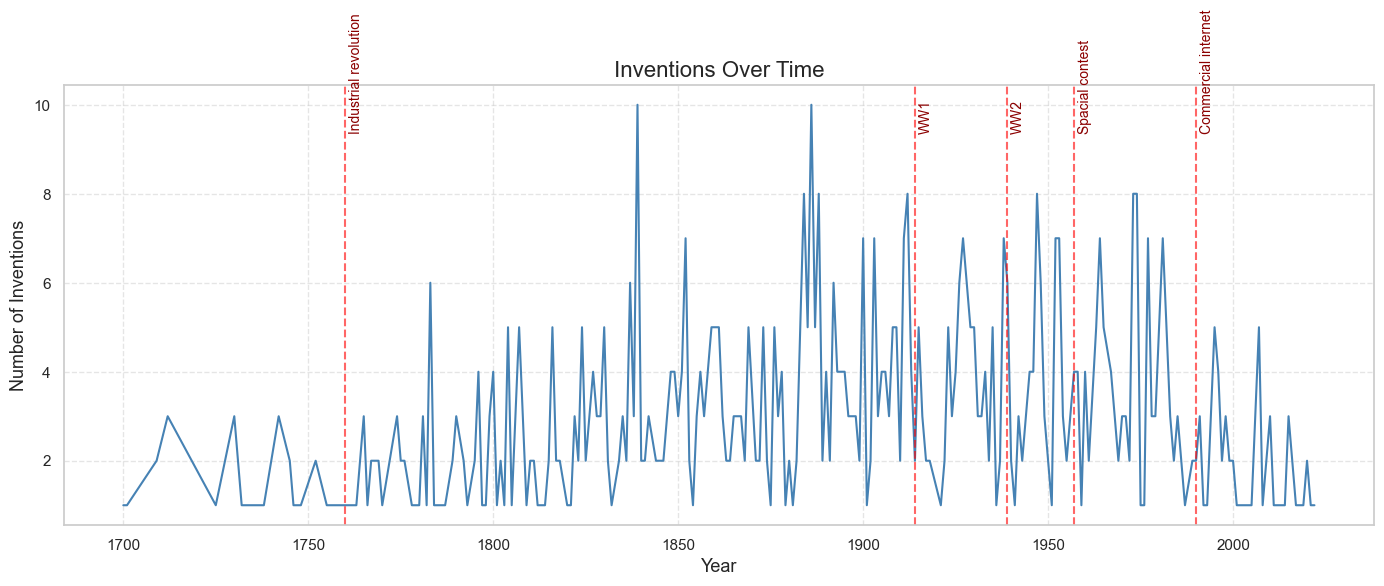

In [33]:
df = pd.read_csv("clean_data_dd.csv")
df.columns = ["Year", "Country", "Invention", "Inventor", "Category", "General_Category"]
df = df[pd.to_numeric(df["Year"], errors="coerce").notna()]
df["Year"] = df["Year"].astype(int)

inventions_per_year = df.groupby("Year").size()

plt.figure(figsize=(14, 6))
sns.lineplot(x=inventions_per_year.index, y=inventions_per_year.values, color="steelblue")

plt.title("Inventions Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Inventions")
plt.grid(True, linestyle='--', alpha=0.5)

eventos = {
    1760: "Industrial revolution",
    1914: "WW1",
    1939: "WW2",
    1957: "Spacial contest",
    1990: "Commercial internet",
}

for año, etiqueta in eventos.items():
    plt.axvline(x=año, color='red', linestyle='--', alpha=0.6)
    plt.text(año + 1, plt.ylim()[1]*0.9, etiqueta, rotation=90, color='darkred', fontsize=10)

plt.tight_layout()
plt.show()
